In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.shape

(1460, 81)

In [21]:
x = df.isnull().sum().sort_values(ascending=False)

In [22]:
for i,j in x.items():
    if j>0:
        print(i,j)

PoolQC 1453
MiscFeature 1406
Alley 1369
Fence 1179
FireplaceQu 690
LotFrontage 259
GarageYrBlt 81
GarageCond 81
GarageType 81
GarageFinish 81
GarageQual 81
BsmtFinType2 38
BsmtExposure 38
BsmtQual 37
BsmtCond 37
BsmtFinType1 37
MasVnrArea 8
MasVnrType 8
Electrical 1


<Axes: >

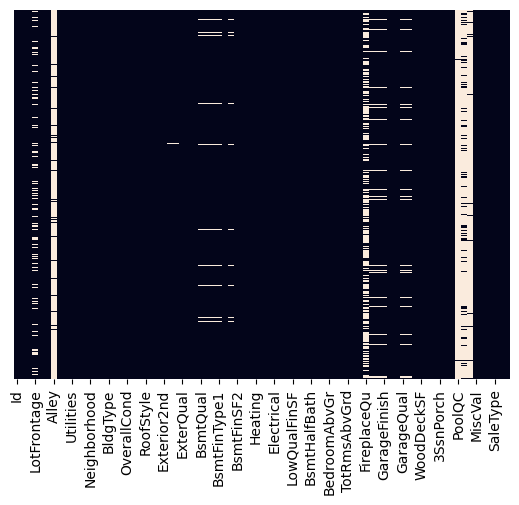

In [9]:
sns.heatmap(df.isnull(), yticklabels = False,cbar = False)

In [23]:
df['LotFrontage'] = df['LotFrontage'].fillna(df.LotFrontage.mean())

In [24]:
df.drop(['Alley'], axis = 1, inplace=True)

In [25]:
def replace_with_mode(col):
    df[col] = df[col].fillna(df[col].mode()[0])

In [26]:
replace_with_mode('BsmtCond')

In [27]:
replace_with_mode('BsmtQual')

In [28]:
replace_with_mode('FireplaceQu')

In [29]:
replace_with_mode('GarageType')

In [30]:
for i in ['GarageFinish','GarageQual','GarageCond']:
    replace_with_mode(i)

In [31]:
df.drop(['PoolQC','Fence','MiscFeature'],axis = 1, inplace=True)

In [32]:
df.shape

(1460, 77)

In [35]:
def print_type(col):
    print(type(df[col]))

In [36]:
for i,j in df.isnull().sum().items():
    if j>0:
        print(i,j)
        print_type(i)

MasVnrType 8
<class 'str'>
MasVnrArea 8
<class 'str'>
BsmtExposure 38
<class 'str'>
BsmtFinType1 37
<class 'str'>
BsmtFinType2 38
<class 'str'>
Electrical 1
<class 'str'>
GarageYrBlt 81
<class 'str'>


In [37]:
for i,j in df.isnull().sum().items():
    if j>0:
        replace_with_mode(i)

In [42]:
for j in df.isnull().sum().values:
    if j>0:
        print(j)

<Axes: >

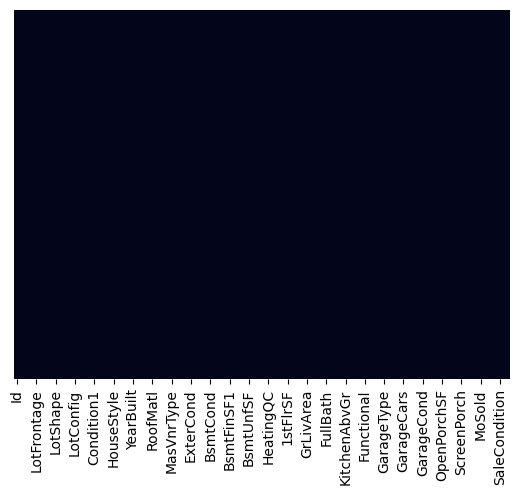

In [43]:
sns.heatmap(df.isnull(), yticklabels = False,cbar = False)

In [44]:
df.shape

(1460, 77)

In [45]:
cols = df.select_dtypes(include='object').columns.to_list()

In [47]:
len(cols)

39

In [68]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df, df_final],axis=1)
        
    return df_final

In [48]:
main_df = df.copy()

In [59]:
xdf = pd.read_csv('xtest.csv')

In [60]:
a = xdf.columns
b = df.columns

In [61]:
for i in b:
    if i not in a:
        print(i)


SalePrice


In [62]:
final_df = pd.concat([df,xdf], axis=0)

In [63]:
final_df.shape

(2919, 77)

<Axes: >

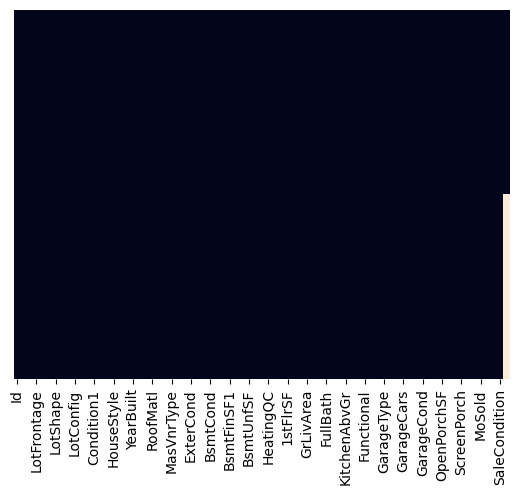

In [64]:
sns.heatmap(final_df.isnull(), yticklabels = False,cbar = False)

In [69]:
final_df = category_onehot_multcols(cols)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [70]:
final_df.shape

(2919, 238)

In [73]:
final_df = final_df.loc[:, ~final_df.columns.duplicated()]

In [74]:
final_df.shape

(2919, 178)

In [75]:
final_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,0,0,1,0,0,0,1,0


In [76]:
df_train = final_df.iloc[:1460,:]
df_test = final_df.iloc[1422:, :]

In [78]:
df_test.drop(['SalePrice'], axis = 1, inplace = True)

C:\Users\badal\AppData\Local\Temp\ipykernel_3628\1609311842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(['SalePrice'], axis = 1, inplace = True)


In [79]:
df_test.shape

(1497, 177)

In [80]:
X_train = df_train.drop(['SalePrice'], axis=1)

In [81]:
y_train = df_train['SalePrice']

In [83]:
import xgboost
classifier = xgboost.XGBRegressor()
classifier.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [84]:
import pickle

In [86]:
f = 'done.pkl'
pickle.dump(classifier, open(f, 'wb'))

In [87]:
y_pred = classifier.predict(df_test)

In [88]:
y_pred

array([137373.48, 274945.06, 143249.48, ..., 171040.02, 102964.77,
       224219.16], dtype=float32)

In [97]:
test_data = pd.read_csv('test.csv')
ids = test_data.pop('Id')
preds = pd.DataFrame(y_pred)
output = pd.DataFrame({'Id': ids,
                       'SalePrice': preds.squeeze()})

output.head()

,Id,SalePrice
0,1461.0,137373.484375
1,1462.0,274945.062500
2,1463.0,143249.484375
3,1464.0,142095.859375
4,1465.0,269793.218750


In [98]:
sample_submission_df = pd.read_csv('sample_submission.csv')
sample_submission_df['SalePrice'] = preds
sample_submission_df.to_csv('submission.csv', index=False)
sample_submission_df.head()

,Id,SalePrice
0,1461,137373.484375
1,1462,274945.062500
2,1463,143249.484375
3,1464,142095.859375
4,1465,269793.218750
